In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Ambil Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Praktikum 2/iris_species.csv')

In [ ]:
X = df.iloc[:, 1:3].values
y = df.iloc[:, -1].values

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y.ravel())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# we're scaling here in order to visualize it easily
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Proses Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

[Text(90.849375, 209.07692307692307, 'X[0] <= -0.503\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(33.480000000000004, 192.35076923076923, 'X[1] <= -0.695\nentropy = 0.571\nsamples = 38\nvalue = [34, 3, 1]'),
 Text(22.32, 175.62461538461537, 'X[0] <= -1.368\nentropy = 1.371\nsamples = 5\nvalue = [1, 3, 1]'),
 Text(11.16, 158.89846153846153, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(33.480000000000004, 158.89846153846153, 'X[0] <= -1.08\nentropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(22.32, 142.1723076923077, 'X[1] <= -1.386\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(11.16, 125.44615384615385, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(33.480000000000004, 125.44615384615385, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(44.64, 142.1723076923077, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(44.64, 175.62461538461537, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(148.21875, 192.350769230769

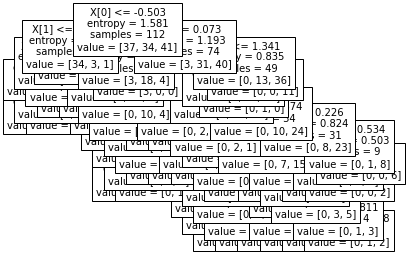

In [ ]:
tree.plot_tree(clf,fontsize=10)

## Plot Hasil

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


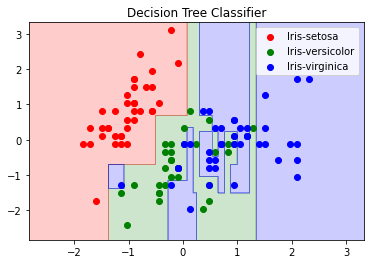

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.2, cmap=ListedColormap(('red', 'green','blue')))
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c=ListedColormap(('red', 'green','blue'))(i), label=np.unique(df.iloc[:, -1].values)[j])
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Decision Tree Classifier')
plt.legend()
plt.show()

## Report Hasil Data Train

Text(0.5, 1.0, 'Confusion Matrix')

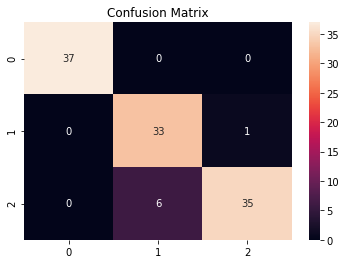

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, ax=ax)
ax.set_title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train.ravel(), y_pred.ravel(), target_names=np.unique(df.iloc[:, -1].values)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.85      0.97      0.90        34
 Iris-virginica       0.97      0.85      0.91        41

       accuracy                           0.94       112
      macro avg       0.94      0.94      0.94       112
   weighted avg       0.94      0.94      0.94       112



## Report Hasil Data Test

Text(0.5, 1.0, 'Confusion Matrix')

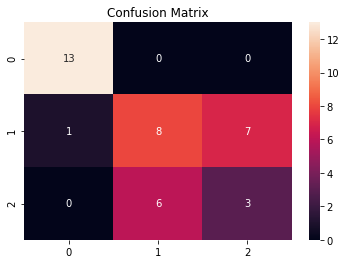

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, ax=ax)
ax.set_title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test.ravel(), y_pred.ravel(), target_names=np.unique(df.iloc[:, -1].values)))

                 precision    recall  f1-score   support

    Iris-setosa       0.93      1.00      0.96        13
Iris-versicolor       0.57      0.50      0.53        16
 Iris-virginica       0.30      0.33      0.32         9

       accuracy                           0.63        38
      macro avg       0.60      0.61      0.60        38
   weighted avg       0.63      0.63      0.63        38



MovieWriter imagemagick unavailable; trying to use pillow instead.


TypeError: ignored

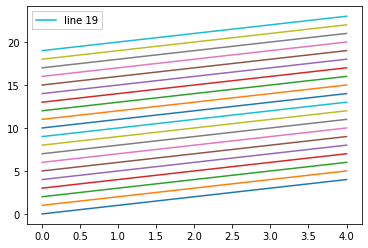

In [3]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(20):
    t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])
    camera.snap()

animation = camera.animate()
animation.save('celluloid_legends.gif', writer = 'imagemagick')

In [2]:
!pip install celluloid